In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [4]:
y_pred = model.predict(x)

In [5]:
print("{}/{} correct".format(np.sum(y == y_pred), len(y)))

1797/1797 correct


In [6]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=0)

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


In [8]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("{}/{} corrects".format(np.sum(y_test == y_pred), len(y_pred)))

441/450 corrects


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.97999999999999998

In [10]:
model.score(x_test, y_test)

0.97999999999999998

In [11]:
for n_neighbors in [1,5,10,20,30]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(x_train, y_train)
    print(n_neighbors, model.score(x_test, y_test))

1 0.991111111111
5 0.98
10 0.975555555556
20 0.964444444444
30 0.955555555556


In [12]:
x1, x2, y1, y2 = train_test_split(x, y, test_size=.5, random_state=0)
x1.shape
x2.shape

(899, 64)

In [13]:
print(KNeighborsClassifier(n_neighbors=1).fit(x1,y1).score(x2,y2))
print(KNeighborsClassifier(n_neighbors=1).fit(x2,y2).score(x1,y1))

0.982202447164
0.983296213808


In [14]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), x, y, cv=10)
cv.mean()

0.97614938602520218

In [15]:
cross_val_score(KNeighborsClassifier(1), x, y, cv=10)

array([ 0.93513514,  0.99453552,  0.97237569,  0.98888889,  0.96089385,
        0.98882682,  0.99441341,  0.98876404,  0.97175141,  0.96590909])

In [16]:
def test_func(x, err=.5):
    y = 10 - 1./(x+0.1)
    if err>0:
        y = np.random.normal(y, err)
    return y

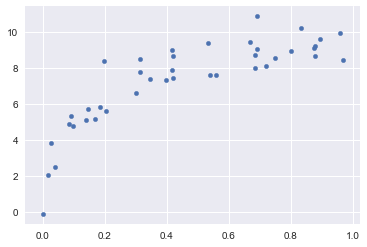

In [17]:
def make_data(N=40, error=1.0, random_seed=1):
    np.random.seed(1)
    x = np.random.random(N).reshape(-1,1)
    y = test_func(x.ravel(), error)
    return x, y
x, y = make_data(40, error=1)
plt.scatter(x.ravel(), y, s=20);

Text(0.5,1,'Mean Squared Error: 1.79')

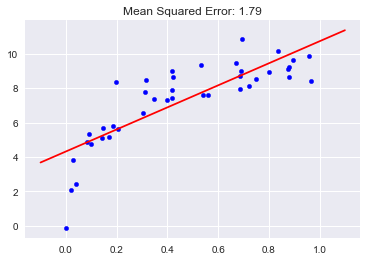

In [18]:
x_test = np.linspace(-.1, 1.1, 500)[:,None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x_test)

plt.scatter(x.ravel(), y, c="b", s=20)
plt.plot(x_test.ravel(), y_pred, "r")
plt.title("Mean Squared Error: {:.2f}".format(mean_squared_error(model.predict(x), y)))

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

(-4, 14)

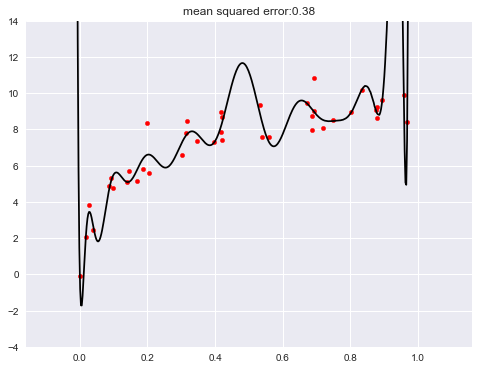

In [20]:
model = PolynomialRegression(20)
model.fit(x,  y)
y_pred = model.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(x.ravel(), y, c="r", s=20)
plt.plot(x_test.ravel(), y_pred, "k")
plt.title("mean squared error:{:.2f}".format(mean_squared_error(model.predict(x), y)))
plt.ylim(-4,14)

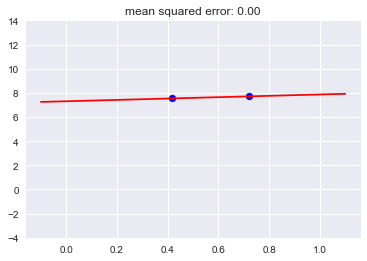

<function __main__.plot_fit>

In [21]:
from IPython.html.widgets import interact

def plot_fit(degree=1, Npts=50):
    x, y = make_data(Npts, error=1)
    x_test = np.linspace(-.1, 1.1, 500)[:, None]
   

    model = PolynomialRegression(degree=degree)
    model.fit(x,y)
    y_pred = model.predict(x_test)
    
    
    plt.scatter(x.ravel(), y, c="b")
    plt.plot(x_test.ravel(), y_pred, "r")
    plt.title("mean squared error: {:.2f}".format(mean_squared_error(model.predict(x),y)))
    plt.ylim(-4,14)
    
interact(plot_fit, degree=[1,30], Npts=[2,100])

DETECTIN OVER-FITTIN WITH VALIDATION CURVES

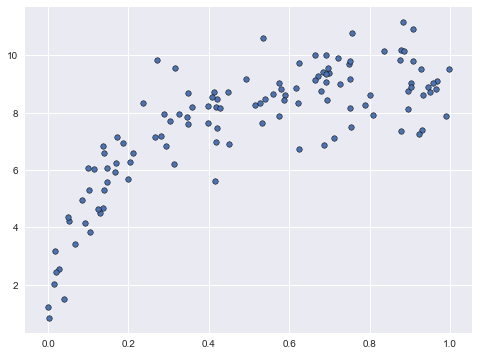

In [22]:
x, y = make_data(N=120, error=1.)
plt.figure(figsize=(8,6))
plt.scatter(x,y, edgecolors="k", lw=.5, s=30)

In [23]:
from sklearn.learning_curve import validation_curve

def rms_err(model, x, y):
    y_pred = model.predict(x)
    return np.sqrt(np.mean((y - y_pred)**2))

degree = np.arange(0,18)
val_train, val_test = validation_curve(PolynomialRegression(), x, y,
                                       "polynomialfeatures__degree",
                                      degree, scoring=rms_err, cv=7)

C:\Python36\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


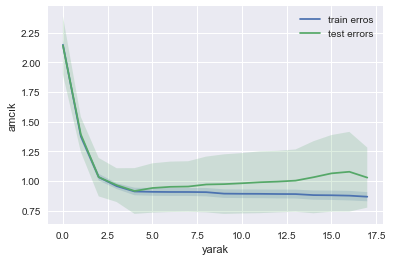

In [24]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, **kwargs)
    plt.fill_between(x, mu - std, mu + std, 
                     facecolor=lines[0].get_color(),
                    edgecolor="none", alpha=.2)
plot_with_err(degree, val_train, label="train erros")
plot_with_err(degree, val_test, label="test errors")
plt.ylabel("amcık"); plt.xlabel("yarak")
plt.legend()

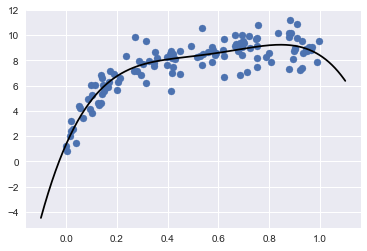

In [25]:
model = PolynomialRegression(4).fit(x, y)
plt.scatter(x.ravel(),y)
x_test = np.linspace(-.1, 1.1, 500)[:, None]
plt.plot(x_test, model.predict(x_test), "k")

DETECTING DATA SUFFICIENCY WITH LEARNING CURVES

In [26]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(degree=3):
    train_sizes = np.linspace(.05, 1, 20)
    N_train, val_train, val_test = learning_curve(
        PolynomialRegression(degree),
        x, y, train_sizes, cv=5,
        scoring=rms_err)
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="training scores")
    plt.xlabel("Training Set Size"); plt.ylabel("rms error")
    plt.ylim(0,3)
    plt.xlim(5,80)
    plt.legend()

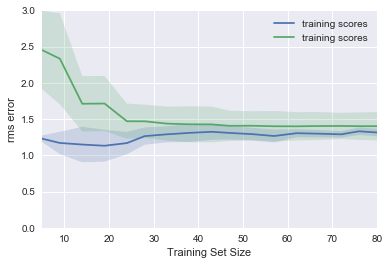

In [27]:
plot_learning_curve(1)